<a href="https://colab.research.google.com/github/Shd289301/Data_science_projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Data Collection and Processing

In [ ]:
#loading data from csv file to pandas dataframe
cars_dataset = pd.read_csv('cars_details.csv')

In [ ]:
#inspecting first five rows of cars dataset
cars_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#checking no. of rows and columns
cars_dataset.shape

(4340, 8)

In [ ]:
#getting some information about dataset
cars_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
#checking no. of missing values
cars_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#checking distribution of categorical data
print('fuel')
print(cars_dataset.fuel.value_counts())
print("")
print('seller_type')
print(cars_dataset['seller_type'].value_counts())
print("")
print('transmission')
print(cars_dataset.transmission.value_counts())
print("")
print('owner')
print(cars_dataset.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

transmission
Manual       3892
Automatic     448
Name: transmission, dtype: int64

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


Encoding categorical data

In [ ]:
#encoding "fuel" column
cars_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
#encoding "seller_type" column
cars_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
#encoding "transmission" column
cars_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
#encoding "owner" column
cars_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [ ]:
cars_dataset

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,0,0


Spliting the data and target

In [ ]:
X = cars_dataset.drop(['name','selling_price','year'],axis=1)
Y = cars_dataset['selling_price']

In [ ]:
print('data')
print("")
print(X)
print("")
print("")
print('target')
print("")
print(Y)

data

      km_driven  fuel  seller_type  transmission  owner
0         70000     1            0             0      0
1         50000     1            0             0      0
2        100000     0            0             0      0
3         46000     1            0             0      0
4        141000     0            0             0      1
...         ...   ...          ...           ...    ...
4335      80000     0            0             0      1
4336      80000     0            0             0      1
4337      83000     1            0             0      1
4338      90000     0            0             0      0
4339      40000     1            0             0      0

[4340 rows x 5 columns]


target

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


Spliting training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
print('Training dataset')
print("")
print("feature data")
print(X_train)
print("")
print("target data")
print(Y_train)
print("")
print("")
print("Testing dataset")
print("")
print("feature data")
print(X_test)
print("")
print("target data")
print(Y_test)

Training dataset

feature data
      km_driven  fuel  seller_type  transmission  owner
159      175000     0            0             0      0
4334     170000     0            0             0      0
1657     110000     1            0             0      0
2188      66521     1            2             0      0
581       41000     1            1             0      0
...         ...   ...          ...           ...    ...
1033      58500     0            1             1      0
3264     110000     0            0             0      0
1653      22000     1            0             0      0
2607      70000     0            0             0      0
2732      62000     1            0             0      1

[3472 rows x 5 columns]

target data
159      300000
4334     600000
1657      95000
2188     775000
581      239000
         ...   
1033    1300000
3264     120000
1653     270000
2607     600000
2732     229999
Name: selling_price, Length: 3472, dtype: int64


Testing dataset

feature data
   

Model Training

1. Linear Regression

In [ ]:
#loading linear regression model
lin_reg_model = LinearRegression()

In [ ]:
#training linear regression model
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#R2 squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R2 squared error : ',error_score)

R2 squared error :  0.3857437365045673


In [ ]:
#prediction on testing data
testing_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#R2 squared error
error_score = metrics.r2_score(Y_test,testing_data_prediction)
print('R2 squared error : ',error_score)

R2 squared error :  0.4431873083444289


Visualise actual price vs predicted price

Text(0.5, 1.0, 'actual price vs predicted price')

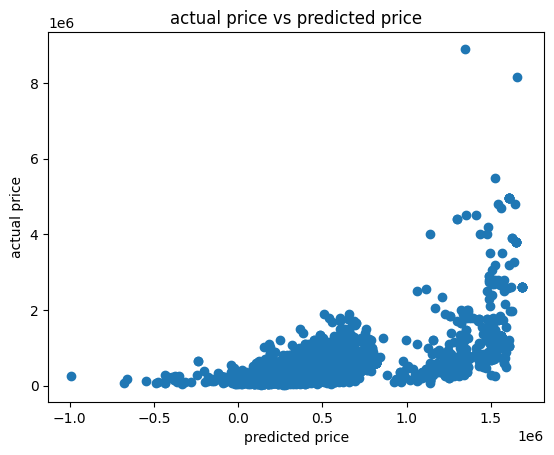

In [ ]:
#visualizing actual price vs predicted price for training data
plt.scatter(y=Y_train,x=training_data_prediction)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('actual price vs predicted price')

Text(0.5, 1.0, 'actual price vs predicted price')

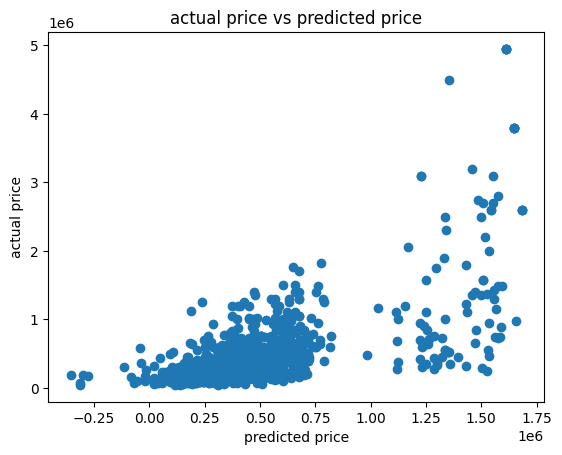

In [ ]:
#visualizing actual price vs predicted price for testing data
plt.scatter(y=Y_test,x=testing_data_prediction)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('actual price vs predicted price')

2. Lasso Regression

In [ ]:
#loading lasso model
lasso_model = Lasso()

In [ ]:
#selecting best alpha parameter
from sklearn.model_selection import GridSearchCV
params = {'alpha':[5,10,15,20,25,30,35,40,50,60,70,80,90]}
lasso_cv = GridSearchCV(estimator=lasso_model,param_grid=params,scoring='neg_mean_squared_error',cv=5)
lasso_cv.fit(X_train,Y_train)


<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')>

In [ ]:
lasso_cv.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5, 10, 15, 20, 25, 30, 35, 40, 50, 60, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')>

In [ ]:
lasso_cv.best_params_

{'alpha': 90}

In [ ]:
#loading best lasso model
lasso_best_model = Lasso(alpha=90)

In [ ]:
#training lasso model
lasso_best_model.fit(X_train,Y_train)

Lasso(alpha=90)

Model Evaluation

In [ ]:
#prediction on testing data
training_lasso_data_prediction = lasso_best_model.predict(X_train)

In [ ]:
#R2 squared error
error_score = metrics.r2_score(Y_train,training_lasso_data_prediction)
print('R2 squared error : ',error_score)

R2 squared error :  0.38574333290750706


In [ ]:
#prediction on testing data
testing_lasso_data_prediction = lasso_best_model.predict(X_test)

In [ ]:
#R2 squared error
error_score = metrics.r2_score(Y_test,testing_lasso_data_prediction)
print('R2 squared error : ',error_score)

R2 squared error :  0.4431237387010104


Visualize actual price vs predicted price

Text(0.5, 1.0, 'actual price vs predicted price')

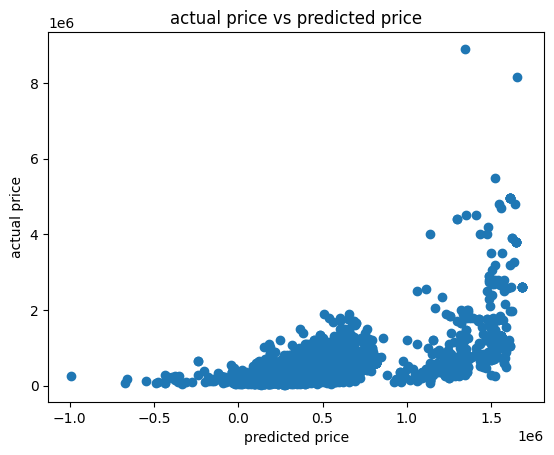

In [ ]:
#visualizing actual price vs predicted price for training data
plt.scatter(y=Y_train,x=training_lasso_data_prediction)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('actual price vs predicted price')

Text(0.5, 1.0, 'actual price vs predicted price')

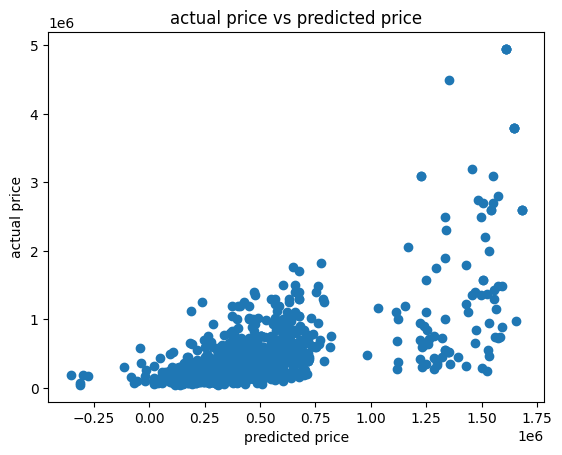

In [ ]:
#visualizing actual price vs predicted price for testing data
plt.scatter(y=Y_test,x=testing_lasso_data_prediction)
plt.xlabel('predicted price')
plt.ylabel('actual price')
plt.title('actual price vs predicted price')